## Installing and importing

In [1]:
import cv2, glob, os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ExifTags

In [2]:
# !pip install insightface==0.2.1 onnxruntime moviepy
# !pip install imageio
# !pip install opencv-python

In [3]:
root_directory='D:/MS/Dissertation/Models/GAN_Models/SimSwap-main'

In [4]:
dir1 = 'D:/MS/Dissertation/Output_results/Faces_Cropped_SimSwap/Expression_Folder'
dir2 = 'D:/MS/Dissertation/Output_results/Faces_Cropped_SimSwap/Neutral_Folder/'

In [5]:
expression_imgs = glob.glob(os.path.join(dir1, '**', '*.jpg*'), recursive=True)
neutral_imgs = glob.glob(os.path.join(dir2, '**', '*.jpg*'), recursive=True)
print('input_img',len(expression_imgs))
print('neutral_imgs',len(neutral_imgs))

input_img 583
neutral_imgs 219


In [6]:
male_expr = {}
female_expr= {}
ntrl = {"male":[], "female":[]}

for images in expression_imgs:
    images = images.replace("\\",'/')
    img_split = images.split('/')
    pain_prompt = img_split[-3]
    if "male" == img_split[-2].lower():
        if pain_prompt not in male_expr.keys():
            male_expr[pain_prompt] = [images]
        else:
            male_expr[pain_prompt].append(images)
    elif "female" == img_split[-2].lower():
        if pain_prompt not in female_expr.keys():
            female_expr[pain_prompt] = [images]
        else:
            female_expr[pain_prompt].append(images)

for images in neutral_imgs:
    images = images.replace("\\",'/')
    img_split = images.split('/')
    pain_prompt = img_split[-3]
    if "male" == img_split[-2].lower():
        ntrl["male"].append(images)
    elif "female" == img_split[-2].lower():
        ntrl["female"].append(images)

# Visualizing the results

In [7]:
# inp_imga = ntrl["female"][4]
# out_imga = female_expr["p2"][8]

# plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
# plt.imshow(X=plt.imread(fname=inp_imga))
# plt.axis('off');
# plt.subplot(1,2,2)
# plt.imshow(X=plt.imread(fname=out_imga))
# plt.axis('off');

Parameters

`--use_mask` - more realism ([ref](https://github.com/neuralchen/SimSwap/blob/main/test_wholeimage_swapmulti.py#L96))

`--crop_size` - input size that depends on the dimensions of the images

`--Arc_path` - path to the model that calculates the similarity between faces

`--pic_a_path` - path to image A (*input*)

`--pic_b_path` - path to image B (*output*)

`--output_path` - path to the folder where the results will be saved

`--no_simswaplogo` - no watermark in the result

In [8]:
def run_command(inp_img, out_img, results, output):
    command = f"python test_wholeimage_swapsingle.py --use_mask --crop_size 224 --isTrain false --name people \
        --Arc_path arcface_model/arcface_checkpoint.tar --pic_a_path {inp_img} --pic_b_path {out_img} \
        --output_path {results} --filename {output} --no_simswaplogo"
    return command

In [9]:
results = 'D:/MS/Dissertation/Output_results/SimSwap/'

for img_value in ntrl['male']:
    output_path = ("/".join(img_value.split("/")[-3:-1]))
    inp_img = img_value
    for key, out_value in male_expr.items():
        image_1 = inp_img.split("/")[-1].split(".")[0].split("_")[-1]

        out_img = male_expr[key][np.random.randint(len(male_expr[key]))]
        
        image_2 =  '_'.join(out_img.split("/")[-1].split(".")[0].split("_")[-2:])

        os.makedirs(name=(results + output_path), exist_ok=True)
        output = '/' + image_1 + "_to_" + image_2 + '.jpg'

        command = run_command(inp_img, out_img, results, (output_path + output))

        os.system(command)
        print('Completed:', output[1:])

Completed: AM1_to_WM2_p1.jpg
Completed: AM1_to_BM12_p2c.jpg
Completed: AM1_to_WM3_p3.jpg
Completed: AM1_to_WM34_p4c.jpg
Completed: AM1_to_OM1_p5c.jpg
Completed: AM1_to_LM4_p6c.jpg
Completed: AM10_to_WM4_p1.jpg
Completed: AM10_to_AM19_p2c.jpg
Completed: AM10_to_BM21_p3c.jpg
Completed: AM10_to_WM40_p4c.jpg
Completed: AM10_to_WM27_p5c.jpg
Completed: AM10_to_LM2_p6c.jpg
Completed: AM11_to_WM23_p1.jpg
Completed: AM11_to_BM14_p2c.jpg
Completed: AM11_to_AM7_p3b.jpg
Completed: AM11_to_BM3_p4.jpg
Completed: AM11_to_BM14_p5c.jpg
Completed: AM11_to_BM20_p6c.jpg
Completed: AM12_to_WM15_p1.jpg
Completed: AM12_to_BM25_p2c.jpg
Completed: AM12_to_BM8_p3c.jpg
Completed: AM12_to_BM25_p4c.jpg
Completed: AM12_to_BM12_p5b.jpg
Completed: AM12_to_LM13_p6c.jpg
Completed: AM13_to_WM11_p1.jpg
Completed: AM13_to_WM7_p2c.jpg
Completed: AM13_to_LM5_p3c.jpg
Completed: AM13_to_BM11_p4c.jpg
Completed: AM13_to_AM13_p5c.jpg
Completed: AM13_to_WM32_p6c.jpg
Completed: AM14_to_BM4_p1.jpg
Completed: AM14_to_BM26_p2c.jpg
Co

In [11]:
for index, img_value in enumerate(ntrl['female']):
    output_path = ("/".join(img_value.split("/")[-3:-1]))
    inp_img = img_value
    for key, out_value in female_expr.items():
        image_1 = inp_img.split("/")[-1].split(".")[0].split("_")[-1]

        out_img = female_expr[key][np.random.randint(len(female_expr[key]))]
        
        image_2 =  '_'.join(out_img.split("/")[-1].split(".")[0].split("_")[-2:])

        os.makedirs(name=(results + output_path), exist_ok=True)
        output = '/' + image_1 + "_to_" + image_2 + '.jpg'

        command = run_command(inp_img, out_img, results, (output_path + output))

        os.system(command)
        print(f'Completed:', output[1:])

Completed: AF1_to_WF35_p2c.jpg
Completed: AF1_to_BF26_p3c.jpg
Completed: AF1_to_WF21_p4c.jpg
Completed: AF1_to_WF12_p5c.jpg
Completed: AF1_to_AF8_p6c.jpg
Completed: AF10_to_AF1_p2c.jpg
Completed: AF10_to_BF29_p3c.jpg
Completed: AF10_to_WF12_p4c.jpg
Completed: AF10_to_WF13_p5c.jpg
Completed: AF10_to_WF7_p6c.jpg
Completed: AF11_to_WF17_p2c.jpg
Completed: AF11_to_AF24_p3c.jpg
Completed: AF11_to_AF24_p4c.jpg
Completed: AF11_to_BF22_p5c.jpg
Completed: AF11_to_LF11_p6c.jpg
Completed: AF12_to_WF10_p2c.jpg
Completed: AF12_to_BF18_p3c.jpg
Completed: AF12_to_WF35_p4c.jpg
Completed: AF12_to_AF1_p5c.jpg
Completed: AF12_to_LF11_p6c.jpg
Completed: AF13_to_LF18_p2c.jpg
Completed: AF13_to_WF34_p3c.jpg
Completed: AF13_to_AF19_p4c.jpg
Completed: AF13_to_LF18_p5c.jpg
Completed: AF13_to_BF28_p6c.jpg
Completed: AF14_to_WF33_p2c.jpg
Completed: AF14_to_WF29_p3c.jpg
Completed: AF14_to_LF18_p4c.jpg
Completed: AF14_to_BF27_p5c.jpg
Completed: AF14_to_LF14_p6b.jpg
Completed: AF15_to_AF13_p2c.jpg
Completed: AF15_t

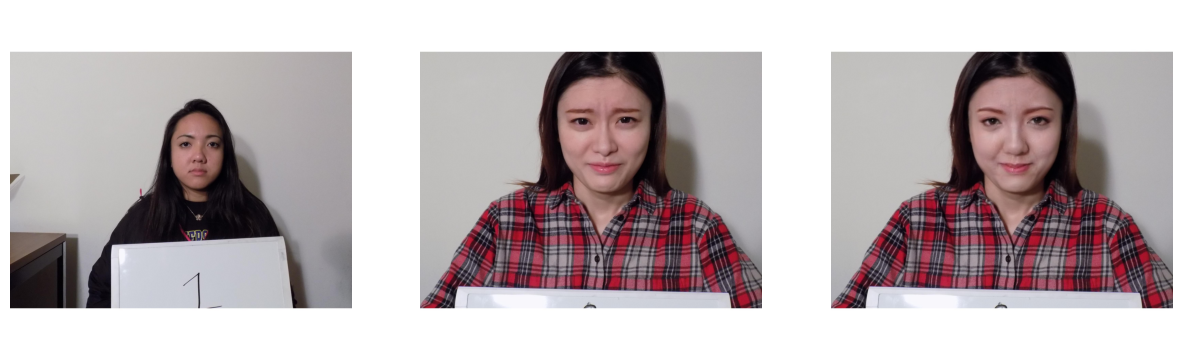

In [41]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(X=plt.imread(fname=inp_imga));
plt.axis('off');
plt.subplot(1,3,2)
plt.imshow(X=plt.imread(fname=out_imga));
plt.axis('off');
plt.subplot(1,3,3)
plt.imshow(X=plt.imread(fname="D:/MS/Dissertation/Models/GAN_Models/SimSwap-main/results/result_whole_swapsingle.jpg"));
plt.axis('off');